# Final Project Submission

Please fill out:
* Student name: Miguel Santana
* Student pace: Full Time
* Instructor name: James Irving

# Project Methodology

**SyriaTel is a telecommunications company looking to improve customer churn. The company provided client data in order to better understand whether a consumer would stop doing business with the company. The OSEMN framework will be used to analyze the dataset and prepare it for machine learning algorithms that will classify feature importance. Selected features will be used to give business insight and reduce customer churn.**

# Data Analysis and Modeling
OSEMN Framework

* Obtain
* Scrub
* Explore
* Model
* INterpret

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import Image
import os
pd.set_option('display.max_columns', 50)
import warnings
warnings.filterwarnings("ignore")

# Obtain
<div class="alert alert-success">

The SyriaTel dataset was obtained on Kaggle's website. The dataset can be found [here.](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset) 

</div>

## Data Frame

In [91]:
df = pd.read_csv('churn_dataset.csv')

# Scrub
## Datatypes

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Null Data

In [93]:
df.isnull().values.any() # Checking for nulls

False

## Duplicates

In [94]:
# Checking for duplicated values in the unique "identifier" column
df['phone number'].duplicated().values.any() 

False

## Feature Values

In [95]:
for col in df.columns: # Preliminary view of value counts per column
    try:
        print(col, df[col].value_counts()[:10])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print 
        # statement will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

state WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
VA     77
WY     77
CT     74
Name: state, dtype: int64


account length 105    43
87     42
93     40
101    40
90     39
86     38
95     38
116    37
100    37
112    36
Name: account length, dtype: int64


area code 415    1655
510     840
408     838
Name: area code, dtype: int64


phone number 389-8096    1
338-6714    1
370-7565    1
366-6751    1
349-7291    1
343-9365    1
364-3567    1
381-2745    1
412-9357    1
349-7138    1
Name: phone number, dtype: int64


international plan no     3010
yes     323
Name: international plan, dtype: int64


voice mail plan no     2411
yes     922
Name: voice mail plan, dtype: int64


number vmail messages 0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
Name: number vmail messages, dtype: int64


total day minutes 174.5    8
159.5    8
154.0    8
175.4    7
162.3    7
        ..
199.9    1
105.8    1
125.

# Exploratory Data Analysis
## Customer Churn
### Customer Service Calls, Voice Mail Plan, International Plan

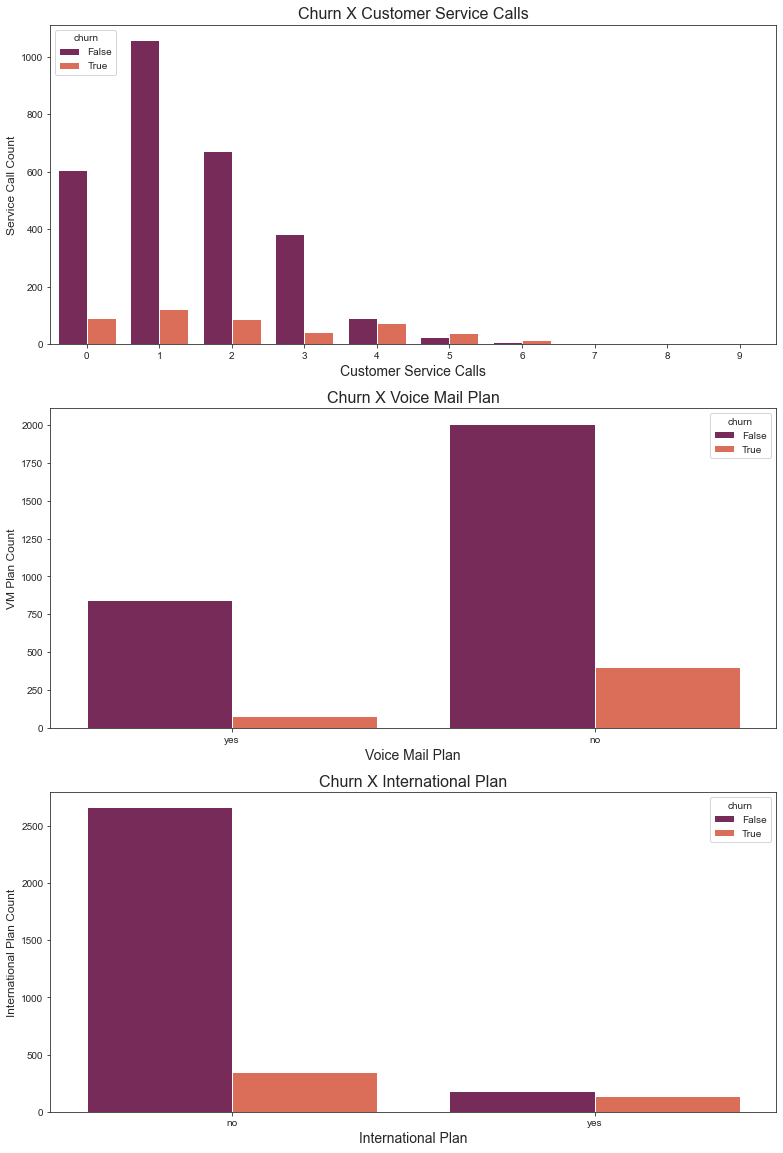

In [96]:
sns.set_style('ticks')
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(13,20))

ax1 = sns.countplot(x='customer service calls', data=df, hue='churn', palette='rocket', ax=ax[0])
ax1.set_title('Churn X Customer Service Calls', fontdict={'fontsize': 16})
ax1.set_xlabel('Customer Service Calls', fontdict={'fontsize': 14})
ax1.set_ylabel('Service Call Count', fontdict={'fontsize': 12})

ax2 = sns.countplot(x='voice mail plan', data=df, hue='churn', palette='rocket', ax=ax[1])
ax2.set_title('Churn X Voice Mail Plan', fontdict={'fontsize': 16})
ax2.set_xlabel('Voice Mail Plan', fontdict={'fontsize': 14})
ax2.set_ylabel('VM Plan Count', fontdict={'fontsize': 12})

ax3 = sns.countplot(x='international plan', data=df, hue='churn', palette='rocket', ax=ax[2])
ax3.set_title('Churn X International Plan', fontdict={'fontsize': 16})
ax3.set_xlabel('International Plan', fontdict={'fontsize': 14})
ax3.set_ylabel('International Plan Count', fontdict={'fontsize': 12})

plt.subplots_adjust(wspace=0.5)
plt.show()

### Total Calls: Day, Eve & Night

<div class="alert alert-success">

Total number of calls will be illustrated in our 'yes' target in order to observe trends in customers who cancel their phone service 

</div>

In [97]:
# yesdf = df_fresh[df_fresh['churn'] == True]

yesdf = df.copy()

In [98]:
# Binning Day Calls
yesdf['daycall_bin'] = yesdf['total day calls'].apply(lambda x: '[0, 25)' if x < 25 
                                else '[25, 50)' if x < 50 
                                else '[50, 75)' if x < 75
                                else '[75, 100)' if x < 100 
                                else '[100, 125)' if x < 125 
                                else '[125, 150)' if x < 150
                                else '[150, 175)' if x < 175 
                                else '[175, 200)' if x < 200 
                                else '[200, 225)' if x < 225
                                else '[225, 250)' if x < 250
                                else '250+')

In [99]:
# Binning Eve Calls
yesdf['evecall_bin'] = yesdf['total eve calls'].apply(lambda x: '[0, 25)' if x < 25 
                                else '[25, 50)' if x < 50 
                                else '[50, 75)' if x < 75
                                else '[75, 100)' if x < 100 
                                else '[100, 125)' if x < 125 
                                else '[125, 150)' if x < 150
                                else '[150, 175)' if x < 175 
                                else '[175, 200)' if x < 200 
                                else '[200, 225)' if x < 225
                                else '[225, 250)' if x < 250
                                else '250+')

In [100]:
# Binning Eve Calls
yesdf['nightcall_bin'] = yesdf['total night calls'].apply(lambda x: '[0, 25)' if x < 25 
                                else '[25, 50)' if x < 50 
                                else '[50, 75)' if x < 75
                                else '[75, 100)' if x < 100 
                                else '[100, 125)' if x < 125 
                                else '[125, 150)' if x < 150
                                else '[150, 175)' if x < 175 
                                else '[175, 200)' if x < 200 
                                else '[200, 225)' if x < 225
                                else '[225, 250)' if x < 250
                                else '250+')

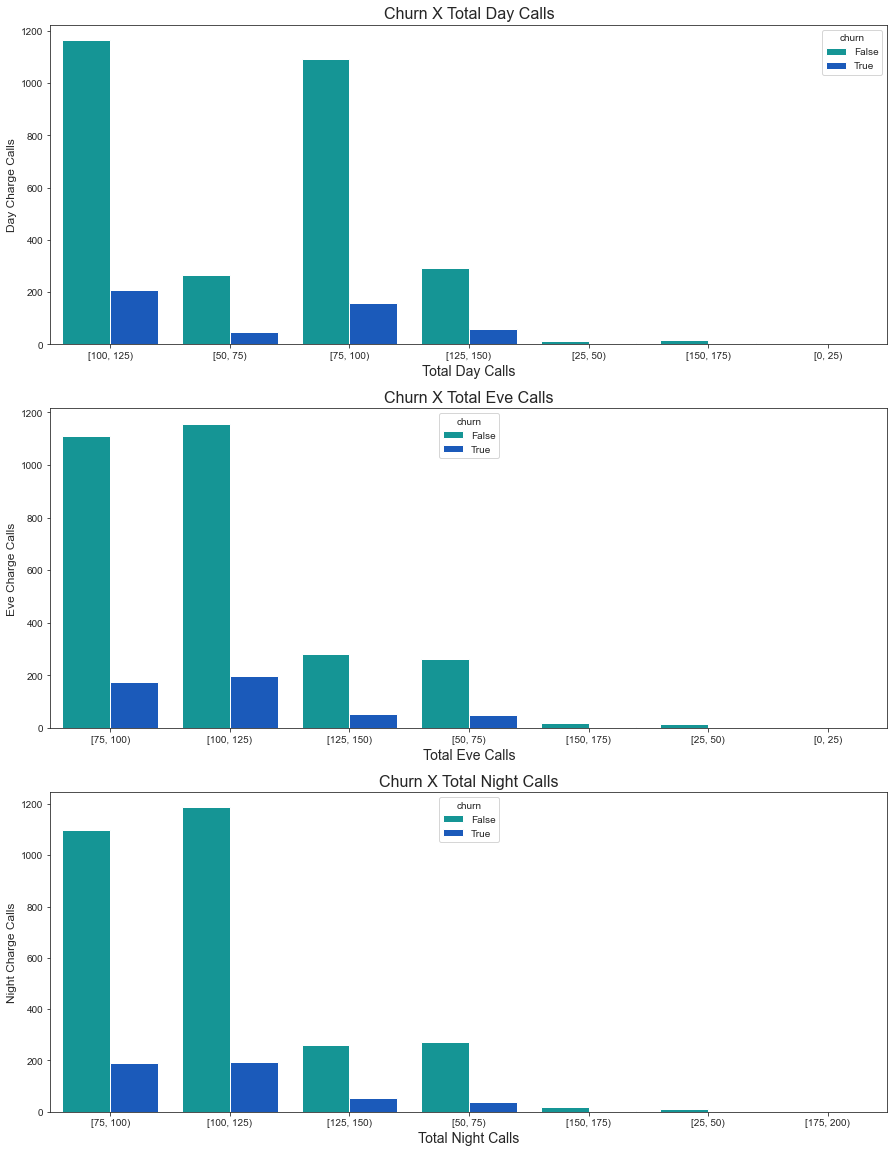

In [101]:
#sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,20))

ax1 = sns.countplot(x='daycall_bin', data=yesdf, hue='churn', palette='winter_r', ax=ax[0])
ax1.set_title('Churn X Total Day Calls', fontdict={'fontsize': 16})
ax1.set_xlabel('Total Day Calls', fontdict={'fontsize': 14})
ax1.set_ylabel('Day Charge Calls', fontdict={'fontsize': 12})

ax2 = sns.countplot(x='evecall_bin', data=yesdf, hue='churn', palette='winter_r', ax=ax[1])
ax2.set_title('Churn X Total Eve Calls', fontdict={'fontsize': 16})
ax2.set_xlabel('Total Eve Calls', fontdict={'fontsize': 14})
ax2.set_ylabel('Eve Charge Calls', fontdict={'fontsize': 12})

ax3 = sns.countplot(x='nightcall_bin', data=yesdf, hue='churn', palette='winter_r', ax=ax[2])
ax3.set_title('Churn X Total Night Calls', fontdict={'fontsize': 16})
ax3.set_xlabel('Total Night Calls', fontdict={'fontsize': 14})
ax3.set_ylabel('Night Charge Calls', fontdict={'fontsize': 12})

plt.subplots_adjust(wspace=0.5)
plt.show()

# Preprocessing
## Type Conversion

In [104]:
# converting floats to integers 
floatcols = ['total day minutes', 'total day charge', 'total eve minutes', 
             'total eve charge', 'total night minutes', 'total night charge', 
             'total intl minutes', 'total intl charge']

for col in floatcols:
    df[col] = df[col].astype('int')

## Column Names

In [105]:
# cleaning column names
subs = [(' ', '_'),('.0','')]

def col_formatting(col):
    '''Replacing Column Features for Model Processing'''
    for old, new in subs:
        col = col.replace(old,new)
    return col

df.columns = [col_formatting(col) for col in df.columns]

## Multicollinearity

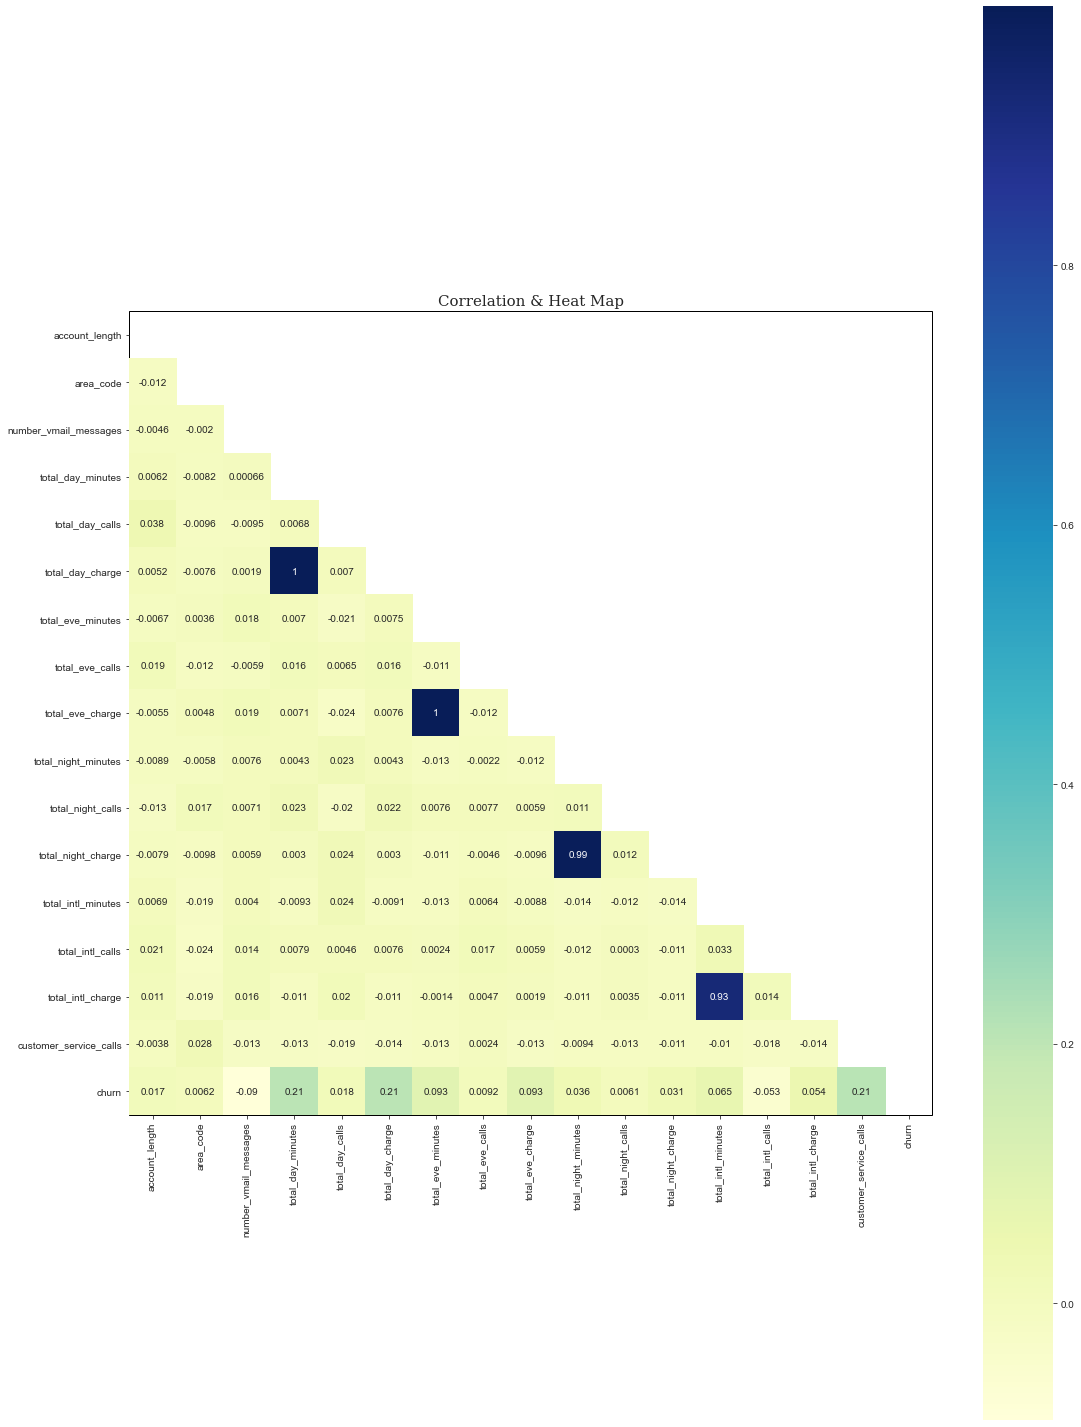

In [106]:
corr = df.corr() # analyzing correlation
# corr
fig, ax = plt.subplots(figsize=(18,26))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask, square=True, annot=True, cmap="YlGnBu")
#xticklabels=labels, yticklabels=labels)
#plt.xticks(rotation=-45, fontsize=16)
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1')
ax.set_title("Correlation & Heat Map", fontsize=15, fontfamily="serif")
plt.show()

<div class="alert alert-success">

Strong correlation between the "total day" categories and total charge. Lesser relationship with "total eve" categories with an even weaker relationship with "total night" categories.

</div>

## Dropping Features

In [107]:
# Drop "charge" categories to address multicollinearity as well as 
# the phone number (identifier) column

df = df.drop(['phone_number', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'], axis=1)

# Model

In [108]:
dataset = df.copy()

In [109]:
import pycaret
import pycaret.preprocess as preprocess
from pycaret.datasets import get_data
from pycaret.classification import *
import pycaret.preprocess as preprocess

In [110]:
dataset.shape

(3333, 16)

## Test/Train Split

In [111]:
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3166, 16)
Unseen Data For Predictions: (167, 16)


## Feature Conversion, Label Encoding, Normalizing & Class Imbalance

<div class="alert alert-success">

Dataset Changes
* Converting categorical variables to numerical
* Label encode data
* Normalizing the dataset using the z-score method. 
* Addressing class imbalance in our target variable using SMOTE. 

**Processing methods available via pycaret's setup function.**

</div>

In [112]:
# testpycar = setup(data = data, target ='churn', create_clusters=True, session_id=0, normalize=True, n_jobs=-1, feature_ratio=True, use_gpu=True)
testpycar = setup(data = data, target = 'churn', numeric_features = ['total_intl_minutes', 'total_intl_calls', 'customer_service_calls'], fix_imbalance=True, session_id=123, normalize=True, n_jobs=-1, feature_ratio=False, use_gpu=True) 

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"False: 0, True: 1"
3,Original Data,"(3166, 16)"
4,Missing Values,False
5,Numeric Features,11
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## Comparing All Models

In [113]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Light Gradient Boosting Machine,0.9477,0.9059,0.7707,0.8562,0.8103,0.7801,0.7821,0.4736
1,CatBoost Classifier,0.9472,0.9051,0.7708,0.8547,0.8100,0.7795,0.7812,3.3868
2,Gradient Boosting Classifier,0.9373,0.9028,0.7771,0.7909,0.7832,0.7465,0.7471,0.7334
3,Extreme Gradient Boosting,0.9355,0.9083,0.7709,0.7871,0.7763,0.7387,0.7405,0.2347
4,Random Forest Classifier,0.9093,0.8884,0.5482,0.7778,0.6382,0.5883,0.6028,0.1104
5,Extra Trees Classifier,0.8994,0.8796,0.4616,0.7568,0.5713,0.5182,0.5397,0.1631
6,Decision Tree Classifier,0.8895,0.8212,0.7249,0.6051,0.6577,0.5927,0.5974,0.0313
7,Ada Boost Classifier,0.8565,0.8287,0.5888,0.5092,0.5442,0.4600,0.4628,0.2084
8,Logistic Regression,0.7599,0.7938,0.6936,0.3413,0.4571,0.3253,0.3593,0.0543
9,K Neighbors Classifier,0.7581,0.7857,0.6844,0.3378,0.4518,0.3190,0.3522,0.0075


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Model: Light Gradient Boosting Machine

In [114]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9369,0.9250,0.7576,0.8065,0.7812,0.7444,0.7449
1,0.9685,0.9484,0.8788,0.9062,0.8923,0.8738,0.8740
2,0.9279,0.8780,0.7273,0.7742,0.7500,0.7079,0.7084
3,0.9234,0.8811,0.6562,0.7778,0.7119,0.6681,0.6713
4,0.9459,0.9360,0.8125,0.8125,0.8125,0.7809,0.7809
5,0.9324,0.8237,0.6562,0.8400,0.7368,0.6988,0.7058
6,0.9593,0.9109,0.8125,0.8966,0.8525,0.8289,0.8303
7,0.9638,0.8985,0.8125,0.9286,0.8667,0.8458,0.8484
8,0.9683,0.9170,0.8438,0.9310,0.8852,0.8669,0.8683
9,0.9502,0.9403,0.7500,0.8889,0.8136,0.7851,0.7888


In [115]:
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


## Tune Hyperparameters

In [116]:
tuned_lightgbm = tune_model(lightgbm, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9505,0.9242,0.8485,0.8235,0.8358,0.8067,0.8068
1,0.9595,0.9381,0.8182,0.9000,0.8571,0.8336,0.8349
2,0.9279,0.8781,0.7273,0.7742,0.7500,0.7079,0.7084
3,0.9234,0.8451,0.6562,0.7778,0.7119,0.6681,0.6713
4,0.9459,0.9451,0.8438,0.7941,0.8182,0.7865,0.7870
5,0.9414,0.8502,0.6875,0.8800,0.7719,0.7389,0.7463
6,0.9502,0.9190,0.7500,0.8889,0.8136,0.7851,0.7888
7,0.9638,0.9208,0.8125,0.9286,0.8667,0.8458,0.8484
8,0.9593,0.9041,0.8125,0.8966,0.8525,0.8289,0.8303
9,0.9548,0.9496,0.7812,0.8929,0.8333,0.8073,0.8097


# Interpret

## AUC-ROC

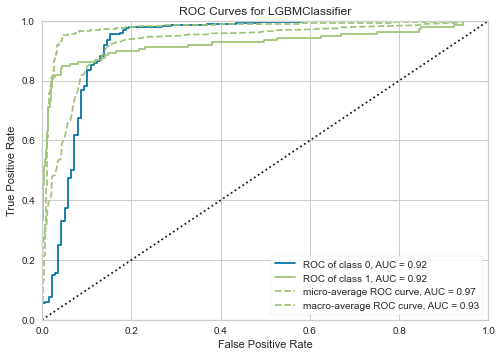

In [117]:
plot_model(tuned_lightgbm, plot = 'auc')

## Feature Selection

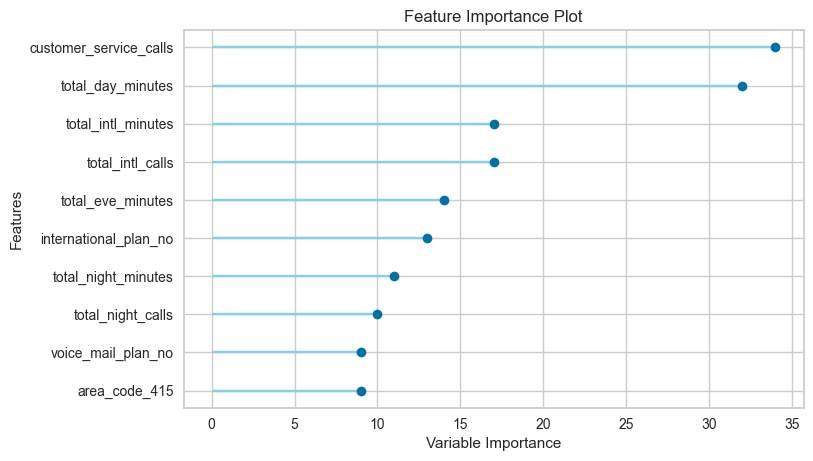

In [118]:
plot_model(tuned_lightgbm, plot='feature')

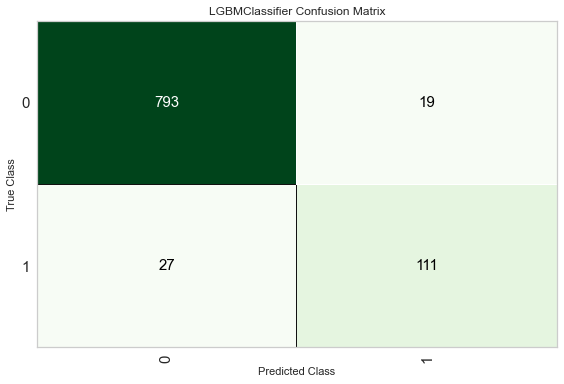

In [119]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

In [122]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [123]:
# final check using the unseen data / test
predict_model(tuned_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9516,0.9245,0.8043,0.8538,0.8284,0.8002,0.8007


In [124]:
# Final Model / trained on the complete dataset
final_lightgbm = finalize_model(tuned_lightgbm)

In [125]:
# predicting using the unseen data
unseen_predictions = predict_model(tuned_lightgbm, data=data_unseen)
unseen_predictions.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,churn,Label,Score
0,AR,54,415,no,no,0,247,85,225,93,244,132,10,2,2,True,True,0.8449
1,NH,152,510,no,no,0,228,93,136,106,197,107,9,2,1,False,False,0.0363
2,TX,201,415,no,no,0,225,110,299,86,251,81,11,4,1,True,True,0.8705
3,ID,78,415,no,no,0,103,115,117,102,201,94,12,3,4,True,True,0.9374
4,CT,67,415,no,no,0,115,70,252,143,208,91,7,6,0,False,False,0.0285


# Feature Importance
<div class="alert alert-success">

The top three features of our model are:
* Customer Service Calls
* Total Day Minutes
* Total International Minutes

</div>

In [151]:
# Binning Total Day Minutes | Visualization
df['day_min_bin'] = df['total_day_minutes'].apply(lambda x: '[0, 25)' if x < 25 
                                else '[25, 50)' if x < 50 
                                else '[50, 75)' if x < 75
                                else '[75, 100)' if x < 100 
                                else '[100, 125)' if x < 125 
                                else '[125, 150)' if x < 150
                                else '[150, 175)' if x < 175 
                                else '[175, 200)' if x < 200 
                                else '[200, 225)' if x < 225
                                else '[225, 250)' if x < 250
                                else '250+')

In [153]:
# Removing The Decimals | Visualization
df['total_intl_minutes'] = df['total_intl_minutes'].astype(int)

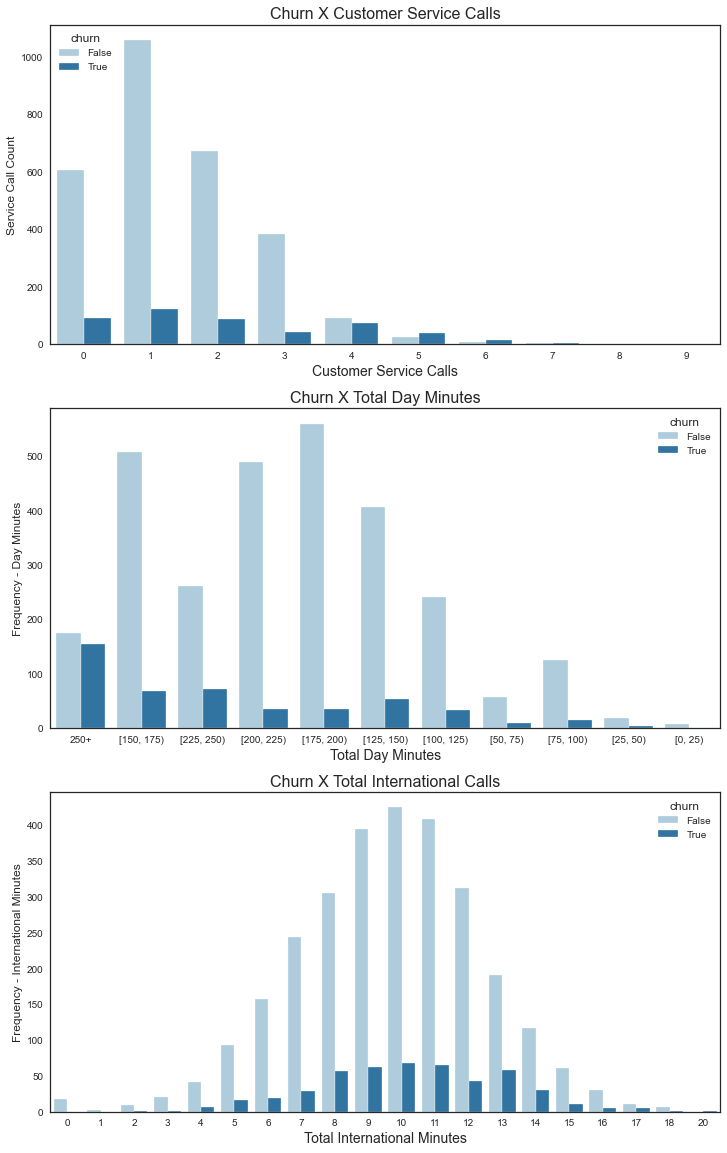

In [155]:
sns.set_style('ticks')
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,20))

ax1 = sns.countplot(x='customer_service_calls', data=df, hue='churn', palette='Paired', ax=ax[0])
ax1.set_title('Churn X Customer Service Calls', fontdict={'fontsize': 16})
ax1.set_xlabel('Customer Service Calls', fontdict={'fontsize': 14})
ax1.set_ylabel('Service Call Count', fontdict={'fontsize': 12})

ax2 = sns.countplot(x='day_min_bin', data=df, hue='churn', palette='Paired', ax=ax[1])
ax2.set_title('Churn X Total Day Minutes', fontdict={'fontsize': 16})
ax2.set_xlabel('Total Day Minutes', fontdict={'fontsize': 14})
ax2.set_ylabel('Frequency - Day Minutes', fontdict={'fontsize': 12})

ax3 = sns.countplot(x='total_intl_minutes', data=df, hue='churn', palette='Paired', ax=ax[2])
ax3.set_title('Churn X Total International Calls', fontdict={'fontsize': 16})
ax3.set_xlabel('Total International Minutes', fontdict={'fontsize': 14})
ax3.set_ylabel('Frequency - International Minutes', fontdict={'fontsize': 12})

plt.subplots_adjust(wspace=0.5)
plt.show()

# Conclusion, Insights and Future Work
## Conclusion
The dataset offered various consumer trends and illustrated multiple areas of opportunity. Two areas of opportunity addressed common retail business pitfalls; customer service and high cost products (international minutes being the most expensive). Lastly, day minutes are the most common of the available categories and directly influenced the majority of consumer costs. These and future trends can be used to prepare for future business.

<div class="alert alert-success">

## Business Recommendations 

**Customer Service Calls:**
* Churn is highest during the first 3 customer service interactions. SyriaTel should deploy an A-Team of high performers to address  incoming service calls from new customers.  

**Total Day Minutes:**
* Total day minutes make up the majority of the minutes consumed and therefore relay to the largest percentage of the total cost. SyriaTel can create and market advertisements for consuming minutes during low peak business hours or consider changing their day pricing (adjusting eve, night and intl costs to compensate).

**Total International Minutes:**
* Churn grows exponentially as consumers go over 7 international minutes. SyriaTel should create an outreach campaign to inform customers when they are going over the 5 international minute threshold. SyriaTel should also consider creating a forgiveness program for first time customers who consumed large amounts of international minutes without knowing the cost (one time only). 

</div>

Future Work
In order to more accurately define the boundaries of our features it is important to understand what customs and cultural influences are tied to this dataset. SyriaTel is not a United States based cell phone carrier and cultural influences may impact the way we perceive the information. In addition, it would be helpful to have more client specific data in order to understand on an individual level which client segments are leaving the company and what features they share. 